---
title: "Assignment 2 - Stock Data Analysis"
author: "Barry, Bella, Emma, Maxim, Robin"
affiliation: "Group 1"
date: today
format:
  pdf:
    geometry:
      - top=2.5cm
      - bottom=2.5cm
      - left=2.5cm
      - right=2.5cm
    fontsize: 11pt
    colorlinks: true
    code-block-bg: "#BFD0D5" 
    code-block-border-left: "#5EC7C0"
    highlight-style: tango
    
---

\newpage
\tableofcontents
\listoffigures
\listoftables
\newpage

Before messing around with the stock data, the environment should install and load the dplyr and lubridate packages as well as others to perform easier data analysis. Additionally, we disable any warning messages for cleaner output. We also remove any rows with NA values in the prcod column.

In [2]:
#| warning: false
library(dplyr)
library(readr)
library(data.table)
library(lubridate)
library(ggplot2)
options(warn=-1)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last



Attaching package: ‘lubridate’


The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union




In [38]:
#| tbl-cap: "Compressed dataset"
data = fread("compressed_data.csv.gz") %>% 
        mutate(datadate = as.Date(datadate, "%d/%m/%Y"))
head(data |> select(-conm, -gvkey))

tic,datadate,exchg,sic,cshtrd,prccd,prchd,prcld,prcod
<chr>,<date>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
PNW,2023-01-03,11,4911,1442534,74.63,76.4125,73.380,76.25
PNW,2023-01-04,11,4911,954218,75.39,76.0950,74.630,75.10
PNW,2023-01-05,11,4911,994775,73.65,75.0950,73.305,74.88
PNW,2023-01-06,11,4911,729808,75.46,76.0200,74.480,74.49
PNW,2023-01-09,11,4911,656127,75.55,76.4800,75.240,75.24
PNW,2023-01-10,11,4911,763254,75.65,75.6950,74.880,75.31


# Part 1 Questions & Answers
## 1. How many unique tickers are in your data?

In [39]:
cat("1. There are", length(unique(data$tic)), "unique tickers.")

1. There are 502 unique tickers.

## 2. How many unique companies are in your data?

In [40]:
cat("\n2. There are", length(unique(data$conm)), "unique company names.")


2. There are 499 unique company names.

## 3. Display the top 5 companies by largest mean trading volume, in a table.

In [41]:
#| tbl-cap: "Top 5 companies by largest mean trading volume"
data_3 = data %>%
    group_by(tic) %>%
    summarise(mean_trading_v = mean(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(mean_trading_v))
data_3[1:5,]

tic,mean_trading_v
<chr>,<dbl>
TSLA,115314383
NVDA,113131835
PLTR,60056251
AAPL,57736403
AMD,57143415


## 4. Display the total trading volume of the top 3 exchanges (table).

In [42]:
#| tbl-cap: "Total trading volume of the top 3 exchanges"
data_4 = data %>%
    group_by(exchg) %>%
    summarise(total_trading_v = sum(cshtrd, na.rm = TRUE)) %>%
    ungroup() %>%
        arrange(desc(total_trading_v))
data_4[1:3,]

exchg,total_trading_v
<int>,<dbl>
11,681415756062
14,570830885382
21,385399362


## 5. Visualise the total trading volume of the top 3 exchanges (bar plot).

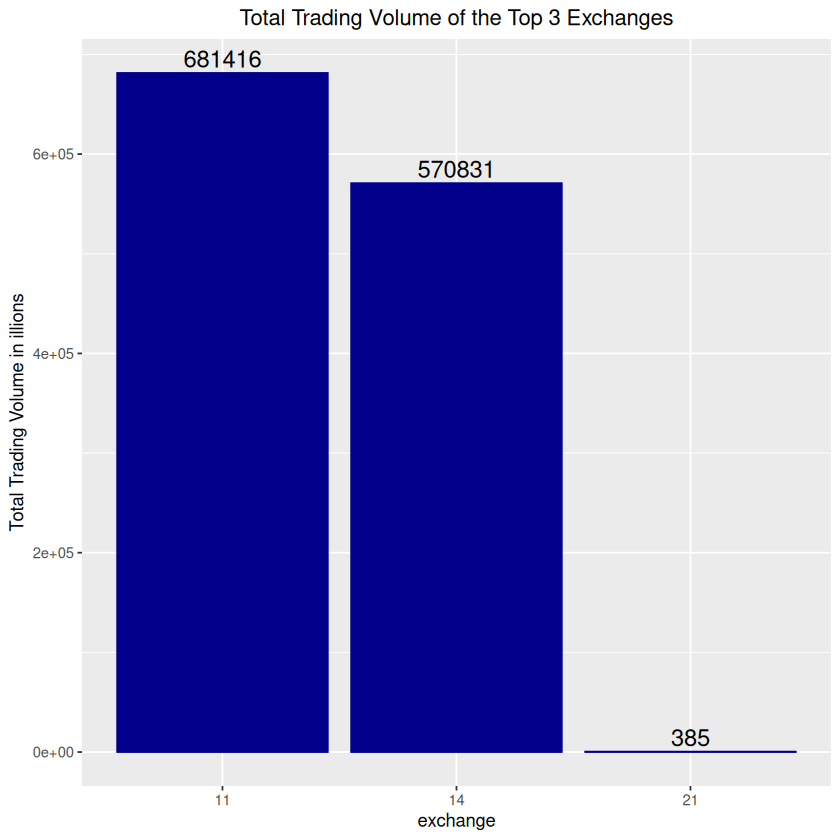

In [43]:
#| fig-cap: "Total Trading Volume of the Top 3 Exchanges"
ggplot(data_4, aes(x = as.character(exchg), y = total_trading_v/1000000)) +
  geom_bar(stat = "identity", color = "darkblue", fill = "darkblue") +
  geom_text(aes(label = round(total_trading_v/1000000)),
            vjust = -0.3,              # position above the bar
            size = 5) +               # text size
  labs(title = "Total Trading Volume of the Top 3 Exchanges",
  x= "exchange", y="Total Trading Volume in illions") +
  theme(plot.title = element_text(hjust = 0.5))

## 6. How many companies have more than one ticker?

In [44]:
#| tbl-cap: "Companies with more than one ticker"
data_6 = data %>%
    group_by(conm) %>%
    summarise(no_of_tickers = n_distinct(tic)) %>%
    ungroup() %>% 
    filter(!no_of_tickers == 1)
data_6[1:4,]
nr_companies = nrow(data_6)
cat("6. There are", nr_companies, "companies with more than one ticker.")

conm,no_of_tickers
<chr>,<int>
ALPHABET INC,2
FOX CORP,2
NEWS CORP,2
NA,NA


6. There are 3 companies with more than one ticker.

## 7. Which ticker has the largest positive mean return (simple daily return)?

In [45]:
# 7. Which ticker has the largest positive mean return (simple daily return)?
data = data %>% 
    group_by(tic) %>% 
    mutate(return = prccd/lag(prccd)-1) %>% 
    ungroup()

data_7 = data %>% 
    group_by(tic) %>% 
    summarise(mean_return = mean(return, na.rm = TRUE)) %>% 
    ungroup() %>% 
        arrange(desc(mean_return))

highest_mean_return = max(data_7$mean_return)

highest_mean_return_ticker = data_7$tic[
    which.max(data_7$mean_return)
]
cat("7. The", highest_mean_return_ticker, 
"ticker had the highest mean daily return.")
cat("\n-> The return was", round(highest_mean_return, 4)*100,"%.")

7. The PLTR ticker had the highest mean daily return.
-> The return was 0.58 %.

## 8. Which company has the largest positive mean return (simple daily return)?

In [46]:
highest_mean_return_company = data$conm[
    which(data$tic == highest_mean_return_ticker)[1]
] 
cat("8. The", highest_mean_return_company,
"company had the highest mean daily return.")

8. The PALANTIR TECHNOLOG INC company had the highest mean daily return.

## 9. Which industry is represented by the most companies?

In [47]:
data_9 = data %>%
    group_by(sic) %>%
    summarise(no_companies = n_distinct(conm)) %>%
    ungroup() %>% 
    arrange(desc(no_companies))
most_represented_industry = data_9$sic[
    which.max(data_9$no_companies)
]
no_companies_in_most_represented_industry = max(data_9$no_companies)

cat("9. The", most_represented_industry,
"SIC industry has the most companies.")
cat("\n-> There are", no_companies_in_most_represented_industry,
"companies in that industry.")


9. The 6798 SIC industry has the most companies.


-> There are 28 companies in that industry.

# Part 2 Extended Analysis
After preparing the data we carry out the following analysis.

## 1. Calculate simple weekly returns for each ticker in the full dataset

In [ ]:
#| tbl-cap: "Simple weekly returns for each ticker"
data_weekly = data %>% 
    group_by(tic, week = floor_date(datadate, "week")) %>%
    summarise(weekly_close = last(prccd)) %>%
    arrange(tic, week) %>%
    group_by(tic) %>%
    mutate(weekly_return = (weekly_close / lag(weekly_close)) - 1) %>%
    ungroup()

    
head(data_weekly)

`summarise()` has grouped output by 'tic'. You can override using the `.groups`
argument.


tic,week,weekly_close,weekly_return
<chr>,<date>,<dbl>,<dbl>
A,2023-01-01,147.67,NA
A,2023-01-08,156.92,0.062639670
A,2023-01-15,155.92,-0.006372674
A,2023-01-22,155.69,-0.001475115
A,2023-01-29,154.55,-0.007322243
A,2023-02-05,152.55,-0.012940796


## 2. Categorise your data into decile groups
(We do not remove zero returns from the data).

In [63]:
#| tbl-cap: "Data categorized by decile groups"
c_breaks = seq(0, 0.9, by = 0.1)
print(c_breaks)

c_labels <- paste0((1:(length(c_breaks) - 1)) * 10, "%")
print(c_labels)

data_weekly_deciles <- data_weekly %>%
  mutate(
    quantiles = cut(
      weekly_return,
      breaks = quantile(
        weekly_return, 
        probs = c(0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1),
        na.rm = TRUE
      ),
      include.lowest = TRUE,
      labels = c("0%","10%", "20%", "30%", "40%","50%", "60%", "70%", "80%", "90%")
    )
  )

head(data_weekly_deciles)

 [1] 0.0 0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9
[1] "10%" "20%" "30%" "40%" "50%" "60%" "70%" "80%" "90%"


tic,week,weekly_close,weekly_return,quantiles
<chr>,<date>,<dbl>,<dbl>,<fct>
A,2023-01-01,147.67,NA,NA
A,2023-01-08,156.92,0.062639670,90%
A,2023-01-15,155.92,-0.006372674,30%
A,2023-01-22,155.69,-0.001475115,40%
A,2023-01-29,154.55,-0.007322243,30%
A,2023-02-05,152.55,-0.012940796,30%


## 3. Display a table showing the top ticker in each decile group

In [61]:
#| tbl-cap: "Top tickers by decile group"
df_top_ticker = data_weekly_deciles %>% 
    group_by(quantiles) %>%
    slice_max(order_by = weekly_return, n = 1) %>%
    select(quantiles, tic, weekly_return) %>%
    arrange(quantiles)


print(df_top_ticker)
df_top_ticker[1:11,]
    

# A tibble: 513 × 3
# Groups:   quantiles [11]
   quantiles tic   weekly_return
   <fct>     <chr>         <dbl>
 1 0%        WBD        -0.0415 
 2 10%       FANG       -0.0248 
 3 20%       IPG        -0.0141 
 4 30%       GLW        -0.00544
 5 30%       PPL        -0.00544
 6 40%       BEN         0.00228
 7 50%       SOLV        0.0101 
 8 60%       HLT         0.0185 
 9 70%       RL          0.0292 
10 80%       SJM         0.0470 
# ℹ 503 more rows


quantiles,tic,weekly_return
<fct>,<chr>,<dbl>
0%,WBD,-0.041522491
10%,FANG,-0.024778495
20%,IPG,-0.014084507
30%,GLW,-0.005441607
30%,PPL,-0.005441607
40%,BEN,0.002281022
50%,SOLV,0.010124164
60%,HLT,0.018477517
70%,RL,0.029158383


## 4. Select the top ticker from the 60% decile group
We use this ticker for the rest of the assignment, including in Part 3.

In [51]:
top_ticker_60d = as.character(df_top_ticker %>% 
    filter(deciles == "60%") %>% 
    select(tic)
    )
cat("4. ", top_ticker_60d)

Adding missing grouping variables: `deciles`


4.  7 HLT

## 5. Plot the autocorrelation function for this ticker's entire set of weekly returns

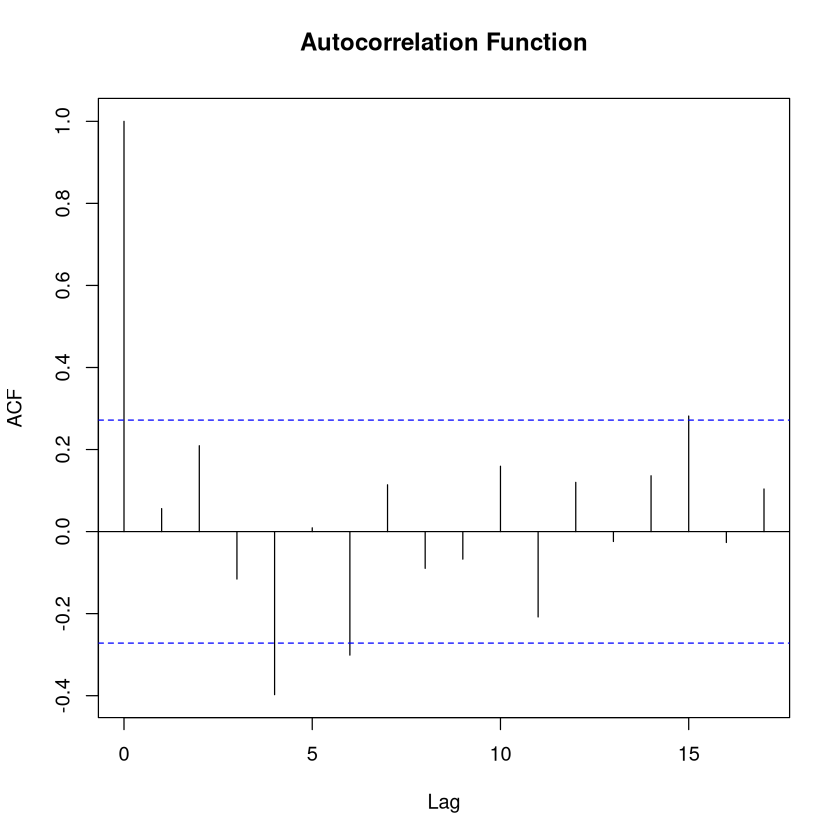

In [52]:
#| fig-cap: "Autocorrelation Function"
# Filter and remove NA values
csco_data = data_weekly %>% 
    filter(tic == top_ticker_60d) %>% 
        na.omit()

acf(csco_data$simple_w_r, main = "Autocorrelation Function")

# Part 3 Regression - Fama-French 3 Factor Model
## 1. Load and clean the weekly Fama-French 3 factor data

In [53]:
#| tbl-cap: "Fama-French 3 Factor Model"
ff <- read.csv("fama_french_weekly.csv", skip = 4) %>%
  rename(x = X,             
         mktrf = Mkt.RF,    
         smb   = SMB,
         hml   = HML,
         rf    = RF) %>%
  mutate(
    date  = ymd(as.character(x)),
    mktrf = mktrf / 100,
    smb   = smb / 100,
    hml   = hml / 100,
    rf    = rf / 100
  ) %>%
  transmute(date, mktrf, smb, hml, rf) %>%
  filter(!is.na(date)) %>%
  arrange(date)

head(ff)

,date,mktrf,smb,hml,rf
,<date>,<dbl>,<dbl>,<dbl>,<dbl>
1,1926-07-02,0.0158,-0.0062,-0.0086,6e-04
2,1926-07-10,0.0037,-0.0090,0.0031,6e-04
3,1926-07-17,0.0098,0.0059,-0.0144,6e-04
4,1926-07-24,-0.0203,0.0002,-0.0017,6e-04
5,1926-07-31,0.0306,-0.0189,-0.0085,6e-04
6,1926-08-07,0.0204,0.0016,0.0055,6e-04


## 2. Fit the Fama-French 3 factor model to the weekly returns of the stock in Part 2

In [54]:
# 1) Get the chosen stock's weekly returns
ticker_data <- data_weekly %>%
  filter(tic == top_ticker_60d) %>%
  select(datadate, simple_w_r) %>%
  filter(!is.na(simple_w_r))

# 2) Join with Fama–French factors (align on week end)
ff_weekly <- ff %>% rename(datadate = date)

merged <- ticker_data %>%
  inner_join(ff_weekly, by = "datadate") %>%
  mutate(excess_return = simple_w_r - rf)

# 3) Fit FF3: excess_return ~ Mkt.RF + SMB + HML
ff3_model <- lm(excess_return ~ mktrf + smb + hml, data = merged)

# 4) Show results
summary(ff3_model)

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't select columns that don't exist.
[31m✖[39m Column `datadate` doesn't exist.


# Analysis Summary

BEWARE: THIS IS NOT FINAL, ADJUST FOR PROPER TICKER AND DATA

CNC showed a moderate positive weekly return of about 1.85%, placing it in the 60% performance decile.
The autocorrelation results indicated no meaningful serial correlation, meaning CNC’s returns are largely random
and past movements do not predict future ones.

The Fama–French 3-factor regression showed a weak positive link with the overall market, a negative relationship
with company size, and a mild positive relationship with value characteristics. However, none were statistically
significant, and the low R² (≈0.05) suggests that most of CNC’s return variation cannot be explained by common
market factors.

This implies CNC’s performance is mainly driven by firm-specific or idiosyncratic factors rather than broad market effects.